In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('/content/sample_data/concrete_data.csv')

In [87]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [88]:
df.size

9270

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [90]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


In [91]:
#EDA

#EDA

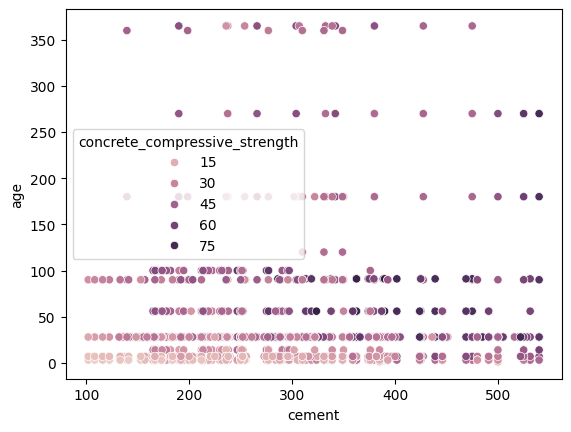

In [92]:
sns.scatterplot(x = df['cement'],y = df['age'],hue = df['concrete_compressive_strength'],data = df)
plt.show()

<Axes: xlabel='water', ylabel='Count'>

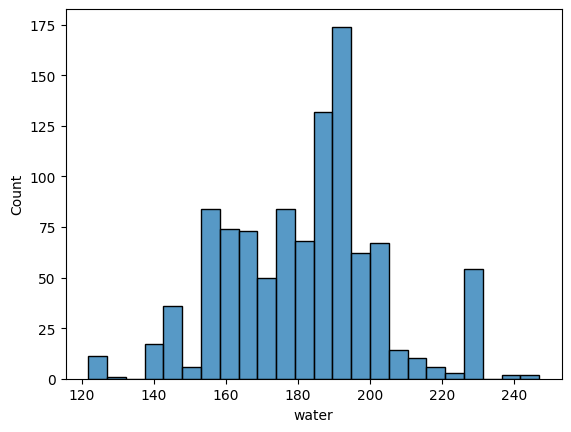

In [93]:
sns.histplot(df['water'])

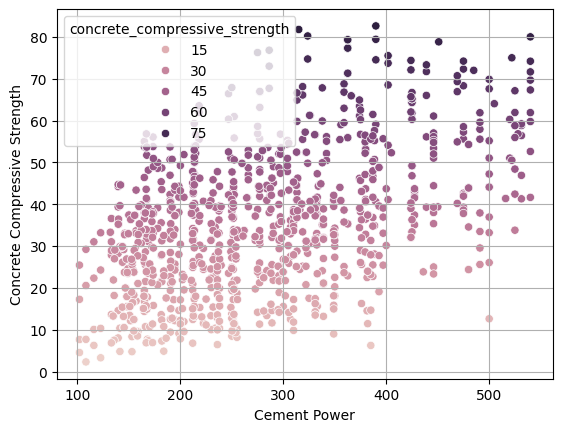

In [94]:
sns.scatterplot(x = df['cement'],y = df['concrete_compressive_strength'],hue = df['concrete_compressive_strength'],data = df)
plt.grid()
plt.xlabel('Cement Power')
plt.ylabel('Concrete Compressive Strength')
plt.show()

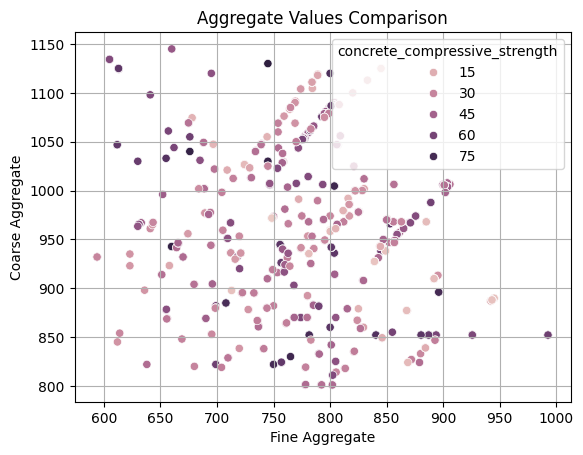

In [95]:
sns.scatterplot(x = df['fine_aggregate '],y = df['coarse_aggregate'],hue = df['concrete_compressive_strength'],data = df)
plt.xlabel('Fine Aggregate')
plt.ylabel('Coarse Aggregate')
plt.title('Aggregate Values Comparison')
plt.grid()
plt.show()

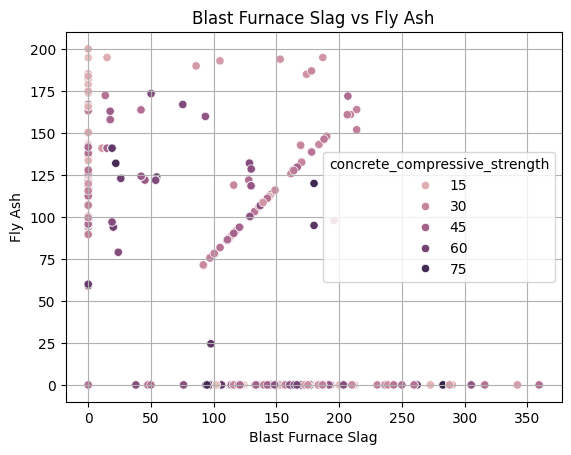

In [96]:
sns.scatterplot(x = df['blast_furnace_slag'],y = df['fly_ash'],hue = df['concrete_compressive_strength'],data = df)
plt.xlabel('Blast Furnace Slag')
plt.ylabel('Fly Ash')
plt.title('Blast Furnace Slag vs Fly Ash')
plt.grid()
plt.show()

Text(0, 0.5, 'Water')

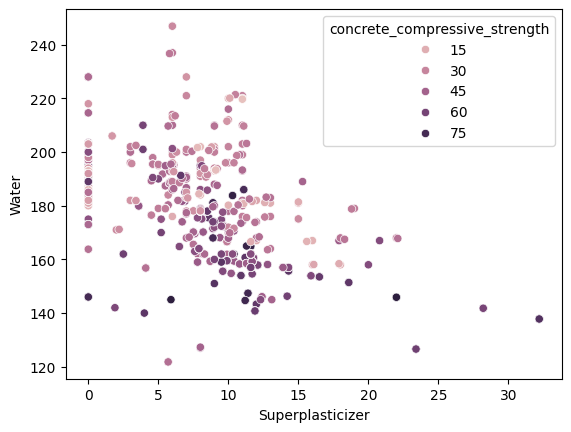

In [97]:
sns.scatterplot(x = df['superplasticizer'],y = df['water'],hue = df['concrete_compressive_strength'],data = df)
plt.xlabel('Superplasticizer')
plt.ylabel('Water')

Text(0, 0.5, 'Concrete Compressive Strength')

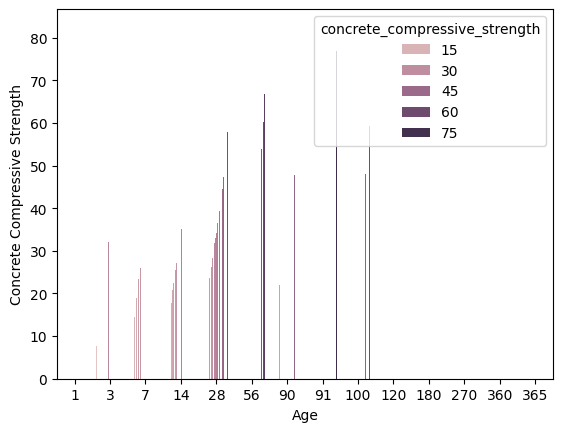

In [98]:
sns.barplot(x = df['age'],y = df['concrete_compressive_strength'],hue = df['concrete_compressive_strength'],data = df)
plt.xlabel('Age')
plt.ylabel('Concrete Compressive Strength')

In [99]:
harder_cement = df.loc[df['concrete_compressive_strength']>=50,['age','concrete_compressive_strength']]

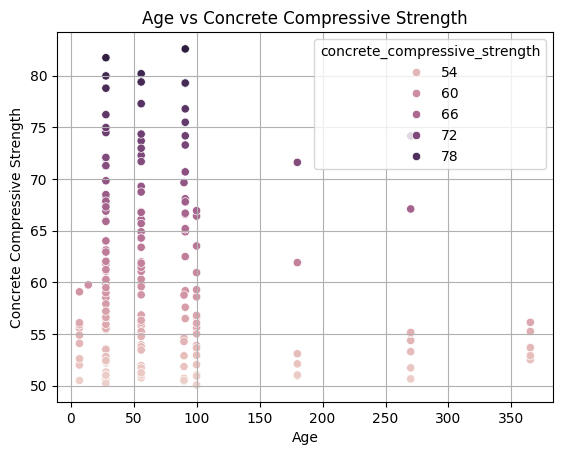

In [100]:
sns.scatterplot(x = harder_cement['age'],y = harder_cement['concrete_compressive_strength'],data = harder_cement,hue = harder_cement['concrete_compressive_strength'])
plt.xlabel('Age')
plt.ylabel('Concrete Compressive Strength')
plt.title('Age vs Concrete Compressive Strength')
plt.grid()
plt.show()

Data PreProcessing Step

<Axes: ylabel='age'>

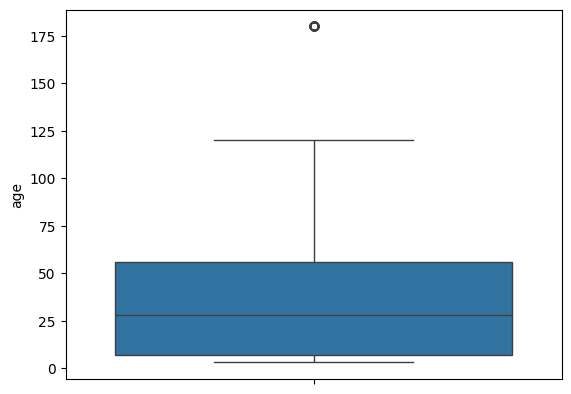

In [104]:
sns.boxplot(df['age'])

In [102]:
df['age'].quantile(0.75)
from scipy.stats.mstats import winsorize
df['age'] = winsorize(df['age'],limits=(0.005,0.05))

In [105]:
a = df['age'].quantile(0.25)
b = df['age'].quantile(0.75)
iqr = b-a

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [106]:
df['age'] = df.loc[(df['age']>=a-1.5*iqr) & (df['age']<=b+1.5*iqr),'age']

In [107]:
df['age'] = df.loc[df['age']<180,'age']

<Axes: ylabel='water'>

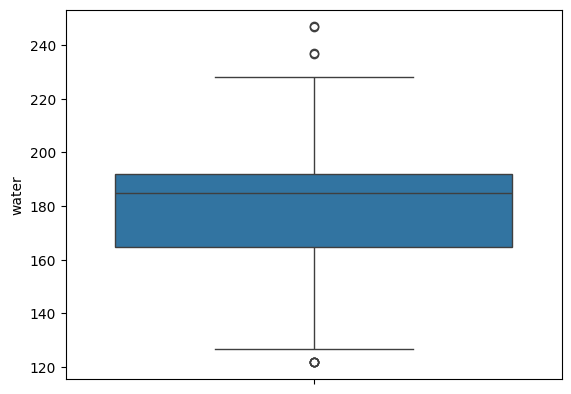

In [108]:
sns.boxplot(df['water'])

In [109]:
df['water'] =df.loc[df['water'] <= 235,'water']
df['water'] = df.loc[df['water'] >= 125,'water']

<Axes: ylabel='superplasticizer'>

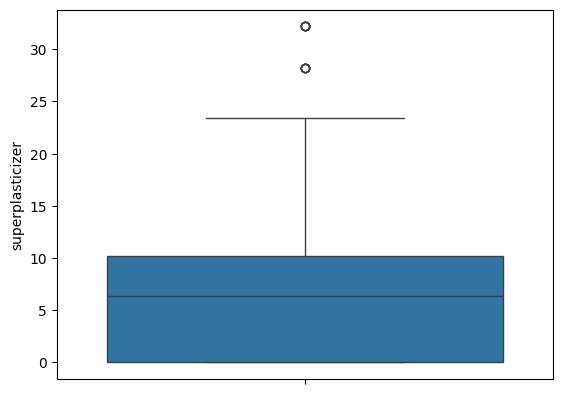

In [110]:
sns.boxplot(df['superplasticizer'])

In [111]:
df['superplasticizer'] = df.loc[df['superplasticizer'] <= 25,'superplasticizer']

<Axes: ylabel='coarse_aggregate'>

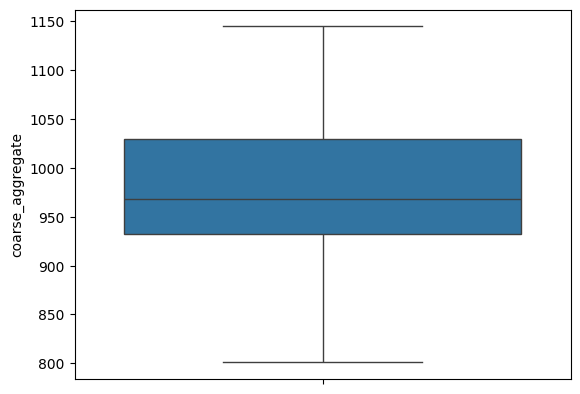

In [112]:
sns.boxplot(df['coarse_aggregate'])

<Axes: ylabel='fly_ash'>

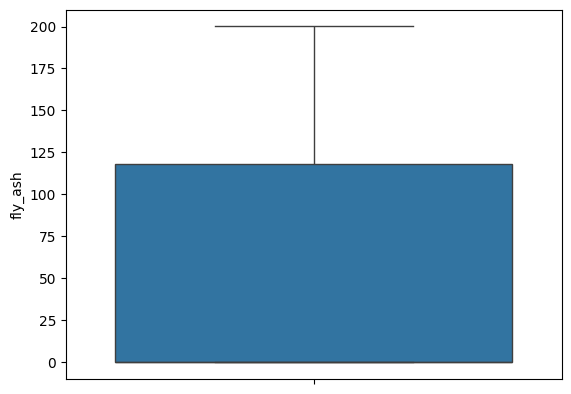

In [113]:
sns.boxplot(df['fly_ash'])

<Axes: ylabel='fine_aggregate '>

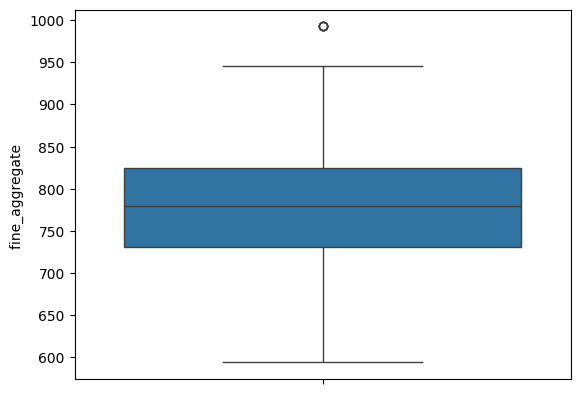

In [114]:
sns.boxplot(df['fine_aggregate '])

<Axes: ylabel='cement'>

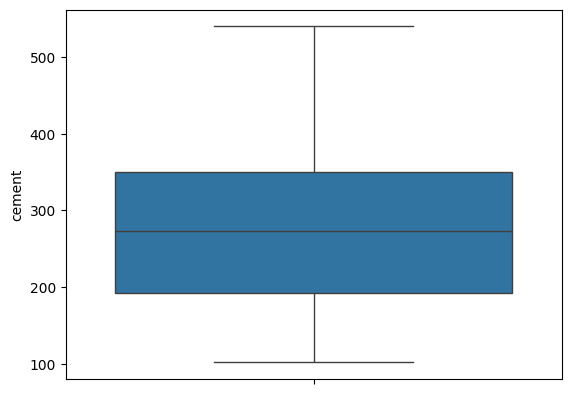

In [115]:
sns.boxplot(df['cement'])

<Axes: ylabel='blast_furnace_slag'>

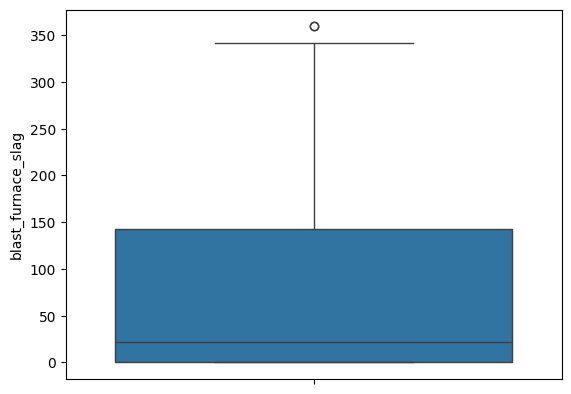

In [116]:
sns.boxplot(df['blast_furnace_slag'])

Feature Scaling And Preprocessing Time:-


In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,NaN,44.30


In [126]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


In [127]:
df['water'].fillna(df['water'].mean(),inplace = True)

/tmp/ipython-input-2742740743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['water'].fillna(df['water'].mean(),inplace = True)


In [128]:
df['age'].fillna(df['age'].mean(),inplace = True)

/tmp/ipython-input-240904280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace = True)


In [129]:
df['superplasticizer'].fillna(df['superplasticizer'].mean(),inplace = True)

/tmp/ipython-input-4190073842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['superplasticizer'].fillna(df['superplasticizer'].mean(),inplace = True)


In [131]:
df_scaled.dropna(inplace=True)

In [130]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.519053,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.519053,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,32.519053,44.30


In [132]:
SC = StandardScaler()
df_scaled = pd.DataFrame(SC.fit_transform(df),columns = df.columns)

In [133]:
df_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.953028,-0.633759,0.863154,-1.217670,-0.162754,2.645408
1,2.477915,-0.856888,-0.847144,-0.953028,-0.633759,1.056164,-1.217670,-0.162754,1.561421
2,0.491425,0.795526,-0.847144,2.252287,-1.090434,-0.526517,-2.240917,0.000000,0.266627
3,0.491425,0.795526,-0.847144,2.252287,-1.090434,-0.526517,-2.240917,0.000000,0.313340
4,-0.790459,0.678408,-0.847144,0.503933,-1.090434,0.070527,0.647884,0.000000,0.507979
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.098277,0.535331,-1.323005,-0.065893,-0.162754,0.506781
1026,0.392819,-0.856888,0.960068,0.698195,0.809337,-1.994680,0.496893,-0.162754,-0.277762
1027,-1.270088,0.759579,0.850635,0.537929,0.023855,-1.036064,0.080107,-0.162754,-0.725729
1028,-1.168610,1.308065,-0.847144,-0.292539,0.973740,0.214641,0.191166,-0.162754,-0.182539


Model Building And Deployment

In [138]:
from sklearn.model_selection import train_test_split
x = df_scaled.drop('concrete_compressive_strength',axis = 1)
y = df_scaled['concrete_compressive_strength']

Using all regressive algorithms to see which performs well

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [141]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
SVR = SVR()
KNR = KNeighborsRegressor()

In [147]:
KNR.fit(x,y)

KNeighborsRegressor()

In [143]:
LR.fit(x,y)

LinearRegression()

In [144]:
DTR.fit(x,y)

DecisionTreeRegressor()

In [145]:
RFR.fit(x,y)

RandomForestRegressor()

In [146]:
SVR.fit(x,y)

SVR()

In [186]:
KNR.fit(x,y)

KNeighborsRegressor()

In [149]:
y_pred_lr = LR.predict(x_test)

In [150]:
y_pred_dtr = DTR.predict(x_test)

In [151]:
y_pred_RFR = RFR.predict(x_test)

In [152]:
y_pred_SVR = SVR.predict(x_test)

In [153]:
y_pred_KNR = KNR.predict(x_test)

In [154]:
from sklearn.metrics import r2_score

In [155]:
a = r2_score(y_test,y_pred_lr)

In [156]:
b = r2_score(y_test,y_pred_dtr)

In [157]:
c = r2_score(y_test,y_pred_RFR)

In [158]:
d = r2_score(y_test,y_pred_SVR)

In [159]:
e = r2_score(y_test,y_pred_KNR)

In [160]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [161]:
r2_scores = [a,b,c,d,e]

In [162]:
r2_cols = ['Linear Regression','Decision Tree','Random Forest','Support Vector Machine','K Neighbors']

In [163]:
df_r2 = pd.DataFrame({'Means of Measure':r2_cols,'R2 Score':r2_scores})

In [164]:
df_r2

,Means of Measure,R2 Score
0,Linear Regression,0.705676
1,Decision Tree,0.995321
2,Random Forest,0.986134
3,Support Vector Machine,0.900346
4,K Neighbors,0.875532


In [165]:
df_r2.sort_values('R2 Score',ascending = False)

,Means of Measure,R2 Score
1,Decision Tree,0.995321
2,Random Forest,0.986134
3,Support Vector Machine,0.900346
4,K Neighbors,0.875532
0,Linear Regression,0.705676


In [177]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [187]:
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [189]:
r_search_cv = RandomizedSearchCV(estimator = DTR, param_distributions = param_grid, cv = 5, n_iter = 50, scoring = 'r2')
g_search_cv = GridSearchCV(estimator = DTR, param_grid = param_grid, cv = 5, scoring = 'r2')

In [194]:
r_search_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'random_state': [42]},
                   scoring='r2')

In [190]:
g_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [42]},
             scoring='r2')

In [192]:
y_pred_gscv = g_search_cv.predict(x_test)

In [195]:
y_pred_rscv = r_search_cv.predict(x_test)

In [196]:
a1 = r2_score(y_test,y_pred_gscv)

In [197]:
b1 = r2_score(y_test,y_pred_rscv)

In [198]:
cv_cols = ['Grid Search','Random Search']

In [199]:
cv_vals = [a1,b1]

In [200]:
search_cv_df = pd.DataFrame({'Means of Measure':cv_cols,'R2 Score':cv_vals})

In [201]:
search_cv_df

,Means of Measure,R2 Score
0,Grid Search,0.808263
1,Random Search,0.808263


In [202]:
df_r2 = pd.concat([df_r2, search_cv_df], ignore_index=True)

In [203]:
df_r2.sort_values('R2 Score',ascending = False)

,Means of Measure,R2 Score
1,Decision Tree,0.995321
2,Random Forest,0.986134
3,Support Vector Machine,0.900346
4,K Neighbors,0.875532
5,Grid Search,0.808263
6,Random Search,0.808263
0,Linear Regression,0.705676


In [204]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.519053,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.519053,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,32.519053,44.30


Additionally if needed to save the file of data into a csv file:-

In [206]:
# TO CSV FILES:-

df.to_csv('Concrete_Scaled_Data')


In [207]:
# TO EXCEL FILES:-

df.to_excel('Concrete_Scaled_Data.xlsx')